**Description**
**Background and Context**

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

**Objective**

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Course/Classification/Project/Loan_Modelling.csv')

# Data Cleaning, Exploratory Data Analysis, Outliers Treatment

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df = df.drop(labels = 'ID', axis = 1)

In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
cat_columns = ['ZIPCode','Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

In [ ]:
for column in cat_columns:
  df[column] = df[column].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


In [ ]:
for column in cat_columns:
  print(df[column].value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
93077      1
94965      1
90068      1
94970      1
91024      1
Name: ZIPCode, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


In [ ]:
a = df['ZIPCode'].value_counts()
(a == 1).value_counts()

False    456
True      11
Name: ZIPCode, dtype: int64

In [ ]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df['Income'] = df['Income']*1000
df['CCAvg'] = df['CCAvg']*1000
df['Mortgage'] = df['Mortgage']*1000

In [ ]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.104600,73774.200000,1937.93800,56498.800000
std,11.463166,11.467954,46033.729321,1747.65898,101713.802102
min,23.000000,-3.000000,8000.000000,0.00000,0.000000
25%,35.000000,10.000000,39000.000000,700.00000,0.000000
50%,45.000000,20.000000,64000.000000,1500.00000,0.000000
75%,55.000000,30.000000,98000.000000,2500.00000,101000.000000
max,67.000000,43.000000,224000.000000,10000.00000,635000.000000



*   From the variable "Age", we can say that the dataset contains people who are from 23 to 67.
*   The minimum value for the variable "Experience" is negative. Since, Experience cannot be negative, let us examine if there are any other negative entries for the variable Experience.



In [ ]:
df1 = df[df['Experience'] < 0]
df[df['Experience'] < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113000,94303,4,2300.0,3,0,0,0,0,0,1
226,24,-1,39000,94085,2,1700.0,2,0,0,0,0,0,0
315,24,-2,51000,90630,3,300.0,3,0,0,0,0,1,0
451,28,-2,48000,94132,2,1750.0,3,89000,0,0,0,1,0
524,24,-1,75000,93014,4,200.0,1,0,0,0,0,1,0
536,25,-1,43000,92173,3,2400.0,2,176000,0,0,0,1,0
540,25,-1,109000,94010,4,2300.0,3,314000,0,0,0,1,0
576,25,-1,48000,92870,3,300.0,3,0,0,0,0,0,1
583,24,-1,38000,95045,2,1700.0,2,0,0,0,0,1,0
597,24,-2,125000,92835,2,7200.0,1,0,0,1,0,0,1


In [ ]:
df1['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

Taking a look at the Age values for the rows with negative Experience values, all the age values are in 20s and with the Experience values being -1, -2, and -3. It could be just that these values were mistakenly entered as negative rather than the positive value. The maximum age value for the negative Experience value is 29. Analyzing the Education level for these 3 rows, we see that the Education level for these rows are 3 meaning Advanced/Professional level - they might have a PhD degree. The Experience value for these rows are -1. Therefore, converting these negative values to their absolute values will resolve this issue.

In [ ]:
for i in range(0,len(df)):
  if (df['Experience'].iloc[i] < 0):
    df['Experience'].iloc[i] = abs(df['Experience'].iloc[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


In [ ]:
df['CCAvg'] = df['CCAvg'].astype('int64')

In [ ]:
df.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,45.338400,20.134600,73774.200000,1937.93800,56498.800000
std,11.463166,11.415189,46033.729321,1747.65898,101713.802102
min,23.000000,0.000000,8000.000000,0.00000,0.000000
25%,35.000000,10.000000,39000.000000,700.00000,0.000000
50%,45.000000,20.000000,64000.000000,1500.00000,0.000000
75%,55.000000,30.000000,98000.000000,2500.00000,101000.000000
max,67.000000,43.000000,224000.000000,10000.00000,635000.000000


In [ ]:
df.sample(n=10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
41,34,9,60000,94122,3,2300,1,0,0,0,0,0,0
2969,43,18,60000,95039,2,2200,3,115000,0,0,0,0,0
389,45,20,155000,90024,1,7000,1,0,0,0,0,1,1
3619,45,20,42000,94703,1,300,3,0,0,0,0,1,0
3194,41,15,65000,90019,3,500,3,0,0,0,0,0,0
4468,67,42,51000,94117,3,2200,1,0,0,0,0,1,1
2914,42,18,42000,95929,2,1700,1,0,0,0,0,1,0
2895,60,36,39000,94501,4,1300,2,140000,0,0,0,1,0
2518,61,37,50000,95125,4,1300,2,0,0,0,0,0,1
4743,50,26,21000,94305,1,200,1,0,0,0,0,1,0


In [ ]:
for column in cat_columns:
  print(df[column].value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
93077      1
94965      1
90068      1
94970      1
91024      1
Name: ZIPCode, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64




*   So, All these 5000 datapoints are from 467 different zipcodes.
*   The dataset contains mostly of Singles, followed by a family size of 2, 3 and 4.
*   As for Education level - all the people in the dataset have atlease an undergrad degree. Most people have an undergrad degree, followed by Advance/Professional type and then the graduate level.
*   The Personal Loan variable which is our target variable as said in the question about 9% have taken a loan contributing to 480 datapoints out of 5000.
*   Most people in the dataset did not have a securities Account
*   Most people in the dataset did not have CD account
*   It is a mix of data when usage of internet banking facilities is concerned, with majority of people using the internet banking facilities.
*   Most people in the dataset did not have credit cards issued by any other bank.





Lets see if all the ZIP Codes are proper - i.e let us see if it all contain 5 digits or does the dataset contain some mistakes.

In [ ]:
df_zipcode_string = []
df_zipcode = df['ZIPCode']
for zipcode in df_zipcode:
  a = str(zipcode)
  df_zipcode_string.append(a)

In [ ]:
for zipcode in df_zipcode_string:
  if len(zipcode) != 5:
    print(zipcode)

So, All the Zipcodes are proper with 5 digits. No mistakes in the Zipcode.

We already resolved the issues with the variable Experience. The dataset looks clean now. Let us now look at the EDA portion.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

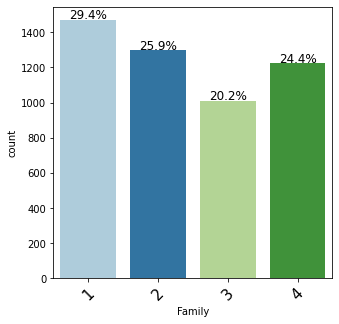

In [ ]:
labeled_barplot(df, "Family", perc=True)

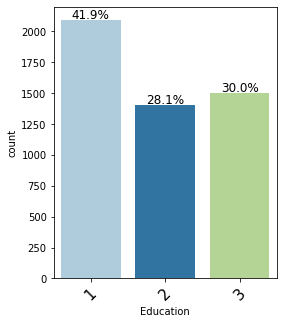

In [ ]:
labeled_barplot(df, "Education", perc=True)

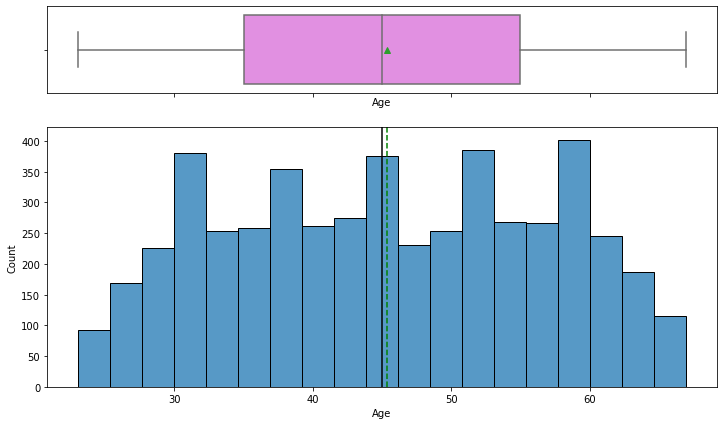

In [ ]:
histogram_boxplot(df,"Age")

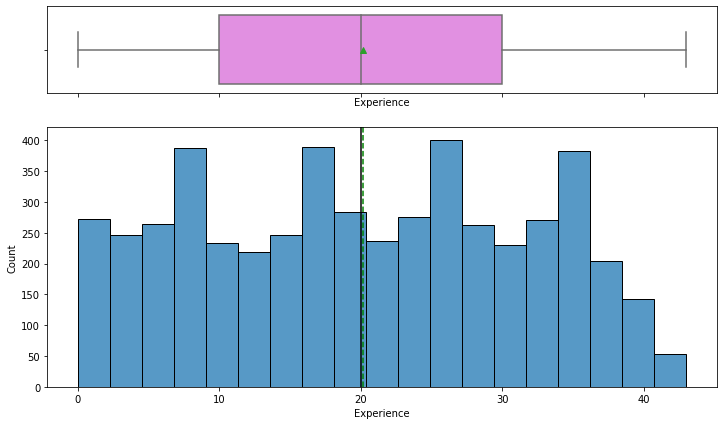

In [ ]:
histogram_boxplot(df,"Experience")

**Age** and **Experience**

From the above 2 graphs, we can see that both Age and Experince have similar distribution with 4 peaks.

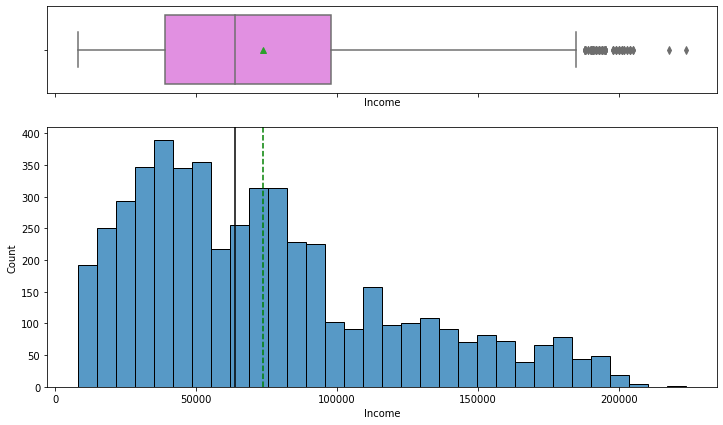

In [ ]:
histogram_boxplot(df,"Income")

**Income**

We can see that Income has high number of outliers. Let us look at the rows for which the income is high.

In [ ]:
Q1 = df["Income"].quantile(0.25)  # 25th quantile
Q3 = df["Income"].quantile(0.75)  # 75th quantile
IQR = Q3 - Q1
Lower_Whisker_income = Q1 - 1.5 * IQR
Upper_Whisker_income = Q3 + 1.5 * IQR

print(Upper_Whisker_income)

186500.0


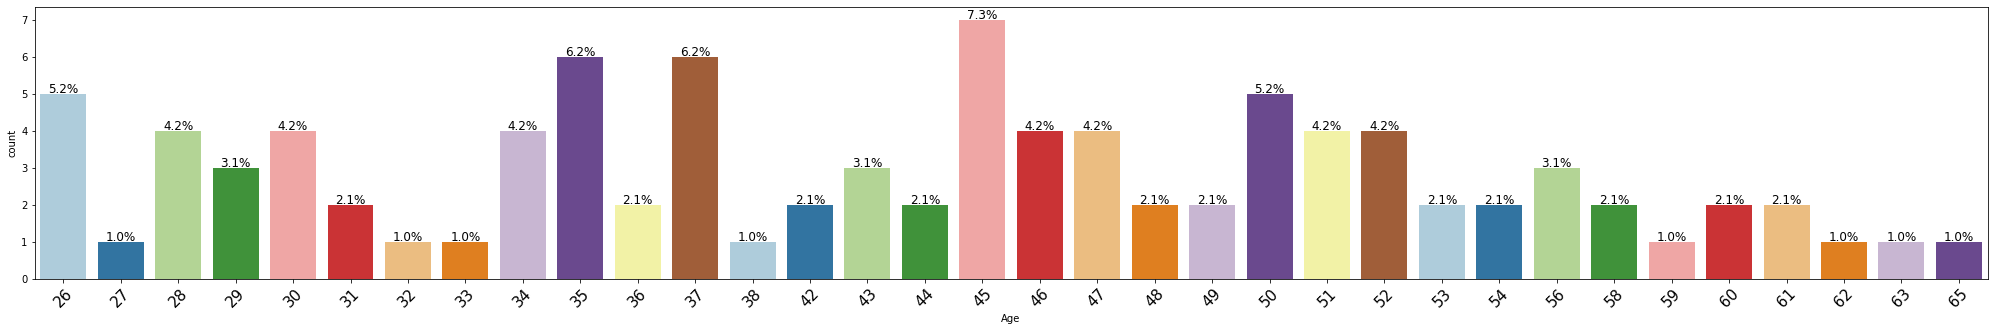

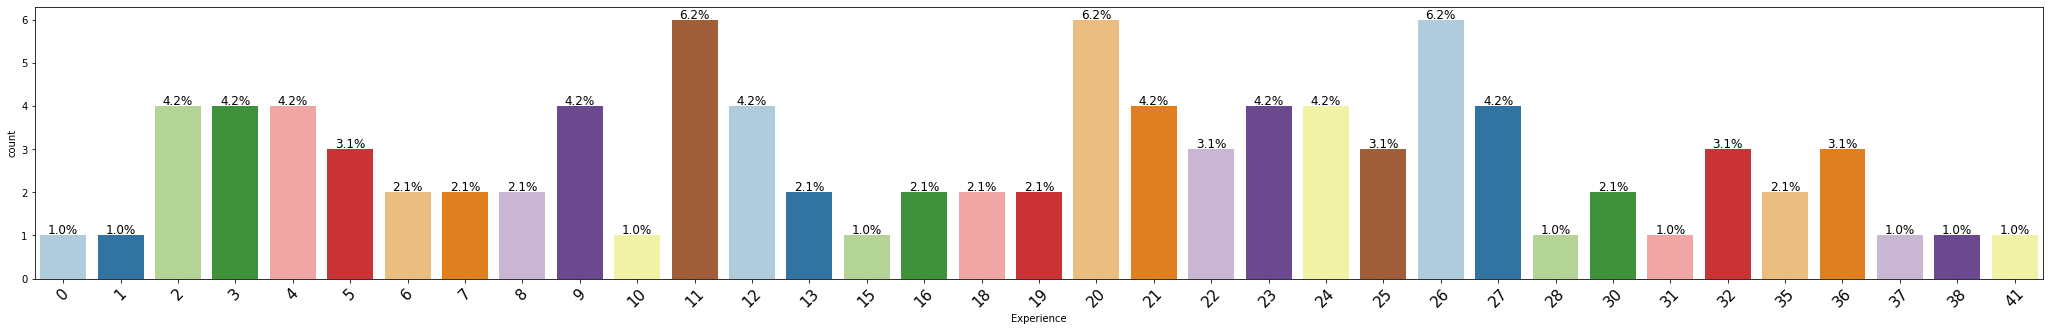

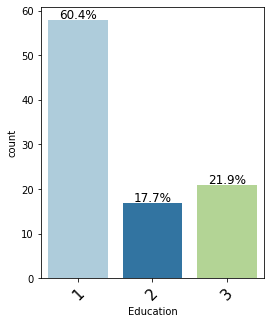

In [ ]:
df_high_income = df[df["Income"]>=186500]
labeled_barplot(df_high_income, "Age", perc=True)
labeled_barplot(df_high_income, "Experience", perc=True)
labeled_barplot(df_high_income, "Education", perc=True)


In [ ]:
df_high_income[df_high_income["Education"]==1]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
59,31,5,188000,91320,2,4500,1,455000,0,0,0,0,0
303,49,25,195000,95605,4,3000,1,617000,1,0,0,0,0
329,28,4,191000,90064,1,6330,1,0,0,0,0,1,0
459,35,10,200000,91107,2,3000,1,458000,0,0,0,0,0
526,26,2,205000,93106,1,6330,1,271000,0,0,0,0,1
677,46,21,204000,92780,2,2800,1,0,0,0,0,1,0
740,52,27,195000,90266,1,8100,1,0,0,0,0,0,0
914,65,41,195000,91711,3,400,1,0,1,1,1,0,1
917,45,20,200000,90405,2,8800,1,0,0,0,0,1,1
1067,50,24,195000,95035,1,1700,1,0,0,0,0,0,0


**Outliers treatment for INCOME**

If we take a look at the Age and Experience and the Education level for the people with high income (outliers) - we see that most people in this category has only undergrad education - Education level 1. Examining further on this we can see that of the people with undergrad education, most people have high age and education which makes it very possible to have such high salaries. Therefore, there could not be a mistake interms of the variable **Income** and hence the outliers, need not be treated in this case.

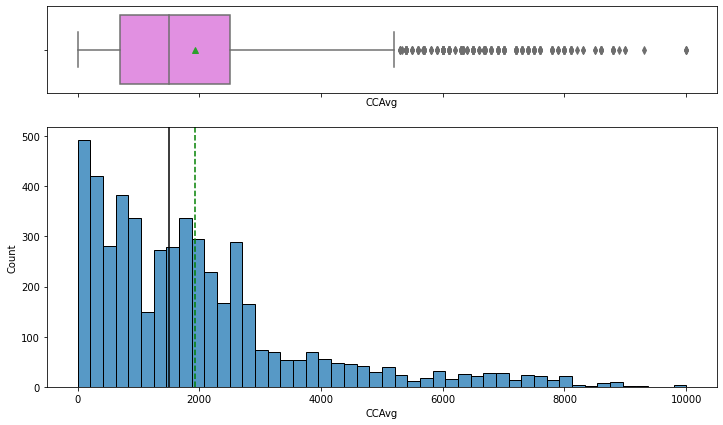

In [ ]:
histogram_boxplot(df,"CCAvg")

Looking at the distribution for the variable CCAvg, there are so many outliers. Lets see if these are actual data or outliers by examining further.

In [ ]:
q1 = df["CCAvg"].quantile(0.25)  # 25th quantile
q3 = df["CCAvg"].quantile(0.75)  # 75th quantile
iqr = q3 - q1
Lower_Whisker_ccavg = q1 - 1.5 * iqr
Upper_Whisker_ccavg = q3 + 1.5 * iqr

print(Upper_Whisker_ccavg)

5200.0


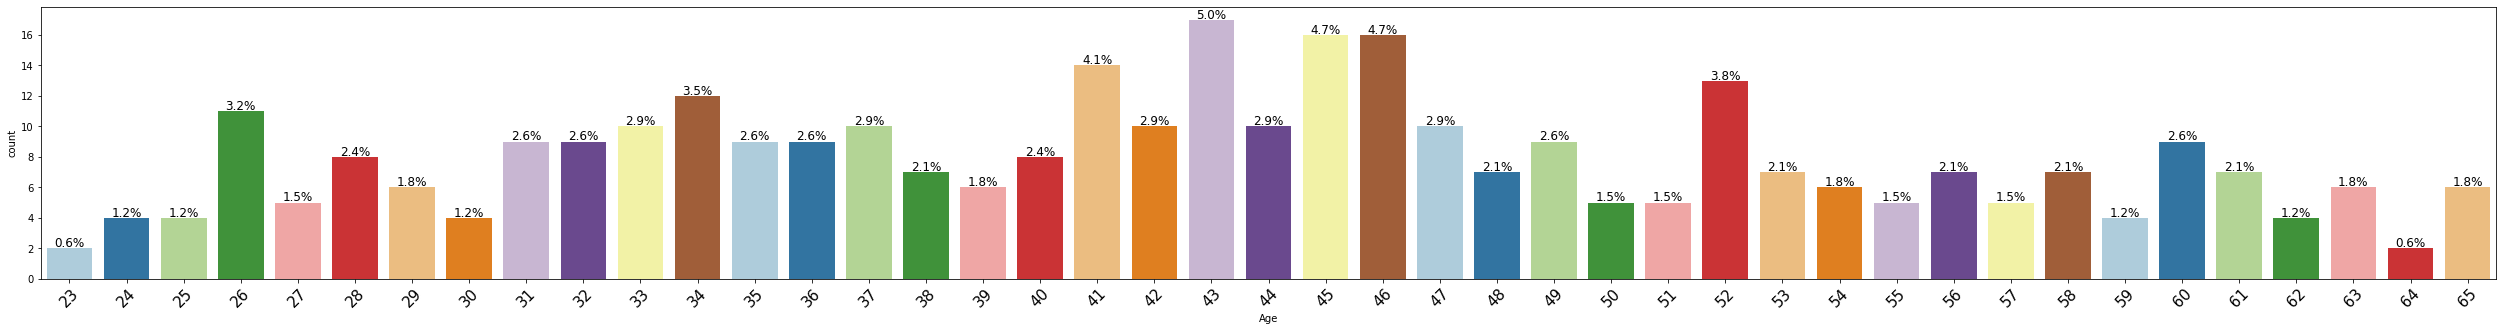

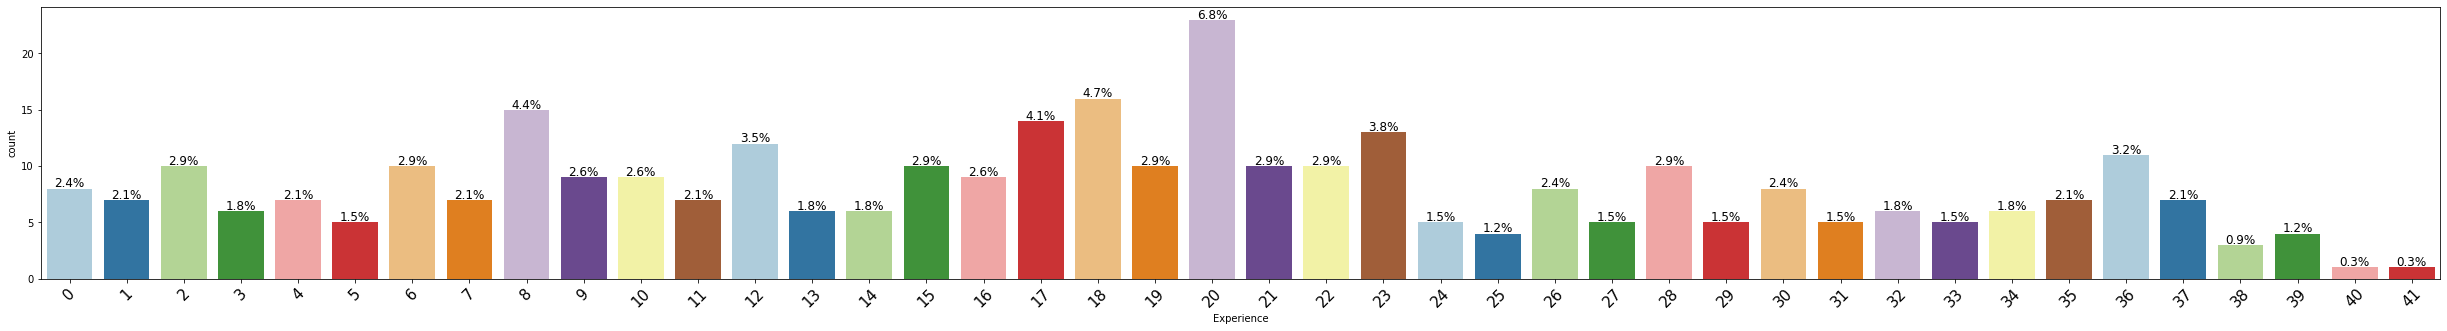

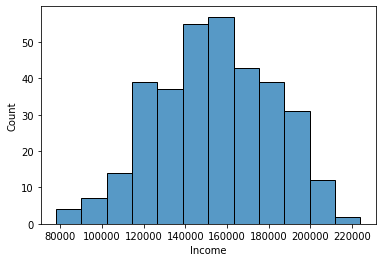

In [ ]:
df_high_ccavg = df[df["CCAvg"]>= Upper_Whisker_ccavg]
labeled_barplot(df_high_ccavg, "Age", perc=True)
labeled_barplot(df_high_ccavg, "Experience", perc=True)
sns.histplot(data = df_high_ccavg, x="Income");

**Outliers treatment for CCAvg**

Looking at the above graphs, we can see that people with high income has high CCAvg, which is kind of obvious. Since, the reasoning for high income outliers was already justified above, we need not treat the outliers for CCAvg as well.

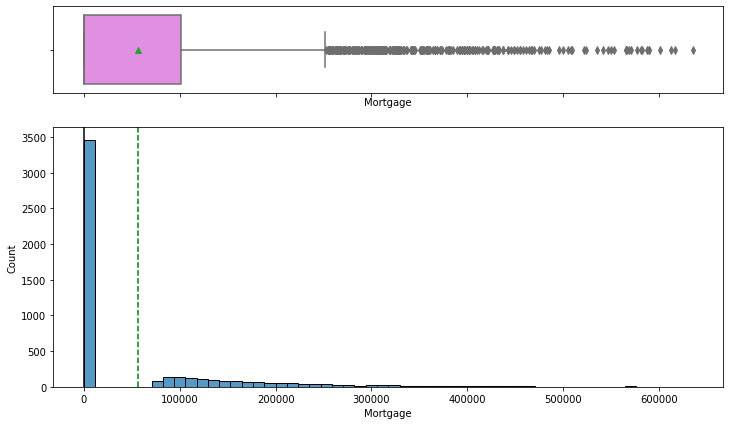

In [ ]:
histogram_boxplot(df,"Mortgage")

There are so many outliers for the variable **Mortgage**. Let us examine further to see if this needs to be treated.

In [ ]:
q1_m = df["Mortgage"].quantile(0.25)  # 25th quantile
q3_m = df["Mortgage"].quantile(0.75)  # 75th quantile
iqr_m = q3_m - q1_m
Lower_Whisker_mortgage = q1_m - 1.5 * iqr_m
Upper_Whisker_mortgage = q3_m + 1.5 * iqr_m

print(Upper_Whisker_mortgage)

252500.0


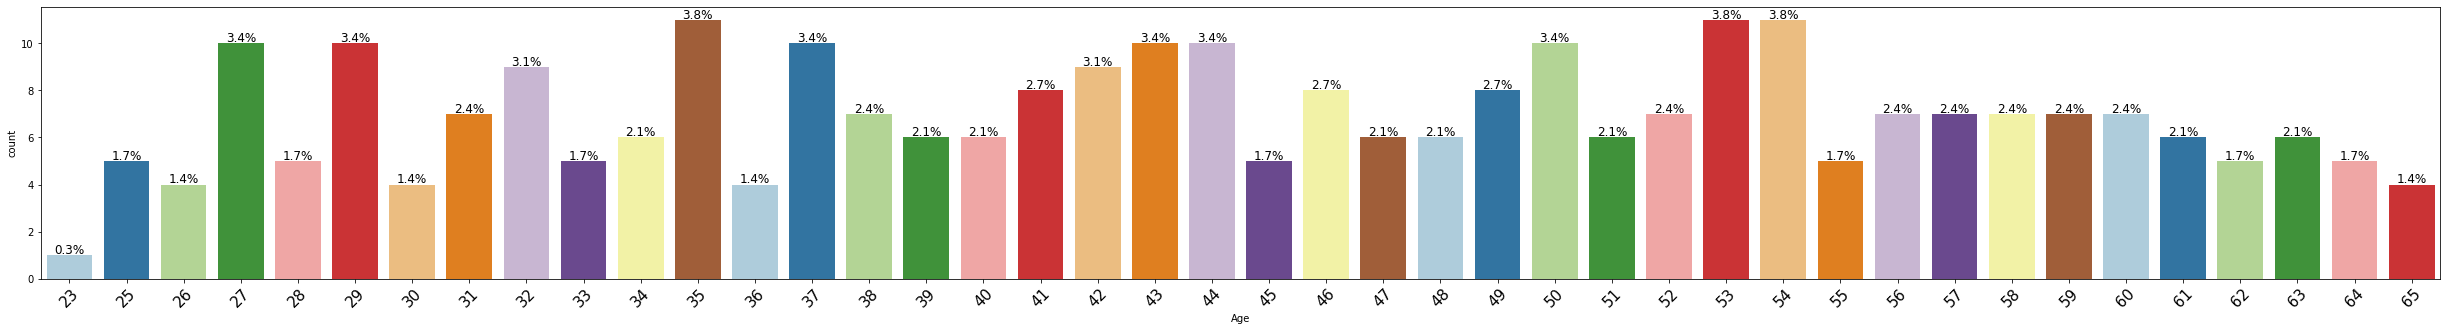

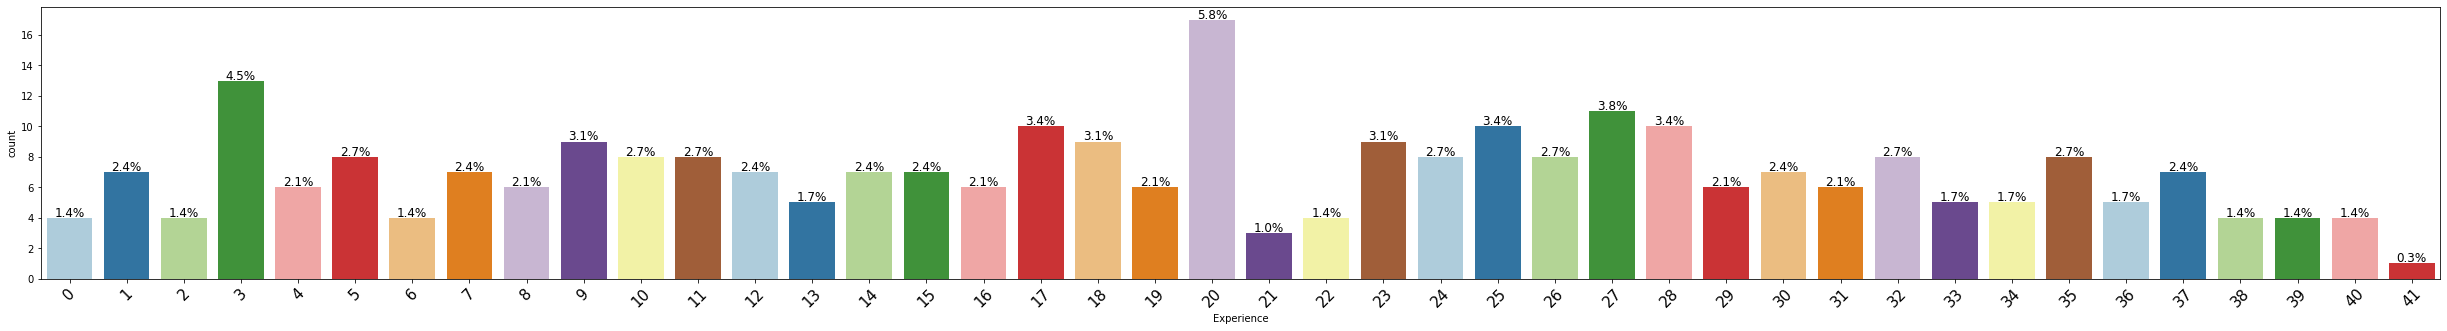

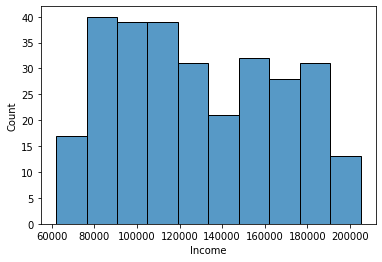

In [ ]:
df_high_mortgage = df[df["Mortgage"]>= Upper_Whisker_mortgage]
labeled_barplot(df_high_mortgage, "Age", perc=True)
labeled_barplot(df_high_mortgage, "Experience", perc=True)
sns.histplot(data = df_high_mortgage, x="Income");

**Outliers Treatment for Mortgage**

From the above graphs, we can see that the income level for all the rows with high mortgage is high. Since high income need not be treated and was justified above, these outliers are reasonable and hence need not be treated.

In [ ]:
df['Mortgage'].value_counts()

0         3462
98000       17
119000      16
89000       16
91000       16
          ... 
547000       1
458000       1
505000       1
361000       1
541000       1
Name: Mortgage, Length: 347, dtype: int64

Out of 5000, 3462 does not have Mortgage and that is why the distribution looks so skewed with many datapoints outside the upper whisker.

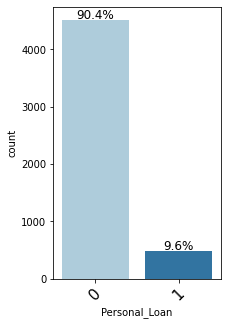

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

As said in the problem statement, about 9% of the people took a loan. Since the other independent variables are of categorical type of just 2 categories, lets not look at the univariate analysis of those variables. We also covered them above. So, lets see how each of the independent variable contributed to the loan acceptance by doing bi-variate analysis.


In [ ]:
df_loan_accepted = df[df["Personal_Loan"]==1]

In [ ]:
df_loan_accepted.shape

(480, 13)

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

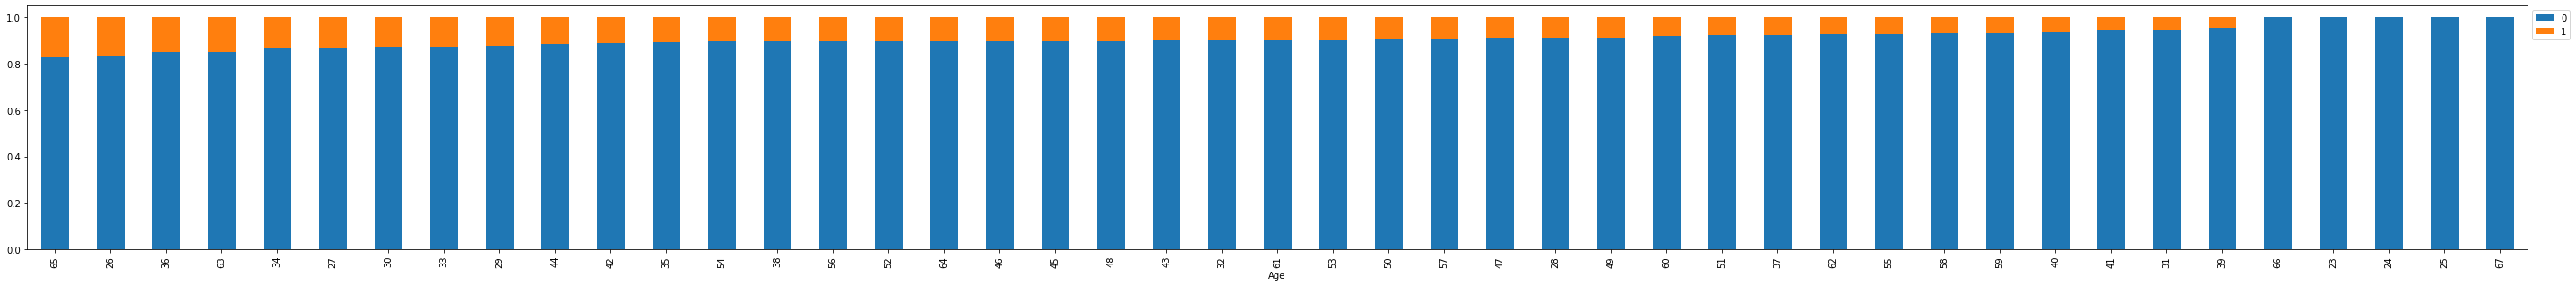

In [ ]:
stacked_barplot(df, "Age" ,"Personal_Loan")

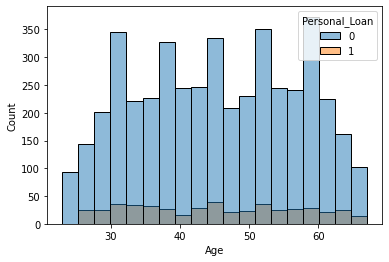

In [ ]:
sns.histplot(data=df,x="Age",hue="Personal_Loan");

**Age vs Personal Loan**

If we take a look at the above 2 graphs, people in the age 23,24,25,66,67 did not take the loan. Most people at age 34 have taken the loan. There are 5 peaks at early 30s, late 30s, mid 40s, early 50s and late 50s, where the people have taken the loan. There could not be any further explanation based on age, because all the other age groups have somewhat evenly distributed loan acceptance. So this could be purely coincidental.   

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
3               116   17   133
20              131   17   148
12               86   16   102
5               132   14   146
32              140   14   154
26              120   14   134
25              128   14   142
19              121   14   135
16              114   13   127
37              103   13   116
35              130   13   143
30              113   13   126
23              131   13   144
22              111   13   124
11              103   13   116
31               92   12   104
36              102   12   114
6               107   12   119
18              125   12   137
7               109   12   121
29              112   12   124
28              127   11   138
17              114   11   125
13              106   11   117
21              102   11   113
39               75   10    85
34              115   10   125
27      

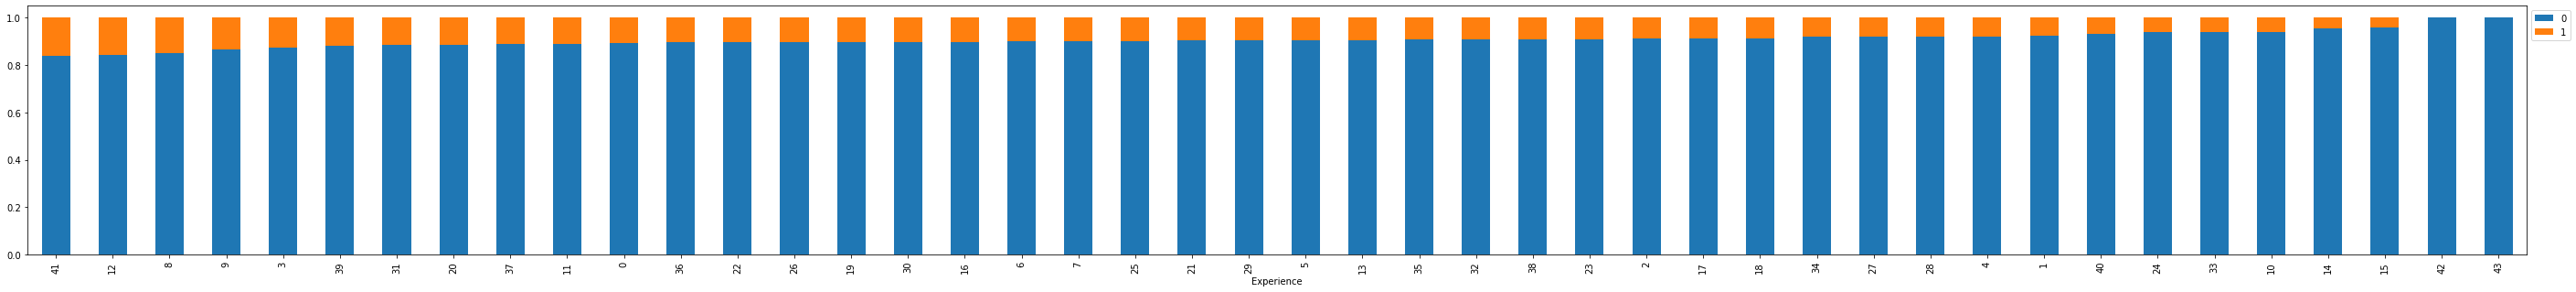

In [ ]:
stacked_barplot(df, "Experience" ,"Personal_Loan")

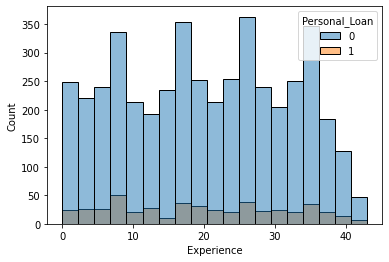

In [ ]:
sns.histplot(data=df,x="Experience",hue="Personal_Loan");

**Experience vs Personal Loan**

From the above 2 graphs, we can conclude that people with highest number of years of experience 42, 43 did not take the loan. This could be because they could be at the age of retiring and might not need a loan.

Other than that, we could see peaks at close to 10, later 10, mid 20, mid 30 years of experience - denoting people at this Experience level have taken the loan.

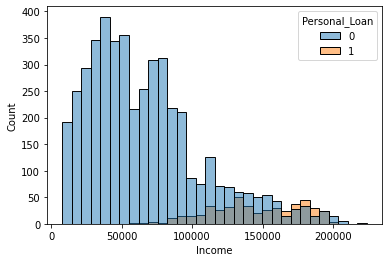

In [ ]:
sns.histplot(data=df,x="Income",hue="Personal_Loan");

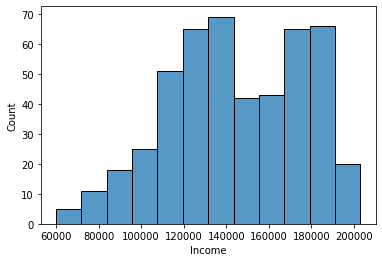

In [ ]:
sns.histplot(data=df_loan_accepted,x="Income");

**Income vs Personal Loan**

One very interesting takeaway from the above graphs is that people who have taken the loan have salaries beyond $60,000. Nobody below that salary took the loan. This could be because of 2 reasons -
1.   They did not have the need for a loan
2.   They could not afford to pay the interest





In [ ]:
df_loan_accepted["ZIPCode"].shape

(480,)

In [ ]:
df_loan_accepted["ZIPCode"].nunique()

238

In [ ]:
df_loan_accepted["ZIPCode"].value_counts()

94720    19
94305    13
92093     9
90095     8
90089     8
         ..
92703     0
92694     0
92692     0
92691     0
96651     0
Name: ZIPCode, Length: 467, dtype: int64

In [ ]:
df_loan_accepted[df_loan_accepted["ZIPCode"]==94720].shape

(19, 13)

In [ ]:
df_zipcodes = df["ZIPCode"]
df_loan_accepted_zipcodes = df_loan_accepted["ZIPCode"]

**ZIPCode vs Personal Loan**

Since, there are 467 unique ZIPcodes in out dataset, to make the analysis easier, let us focus on the ZIPCodes in which people have taken the loan. Of all the ZIPcodes, the ZIP code **94720** has the most number of loans taken - 19 loans, followed by the ZIPCode **94305** - 13 loans.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


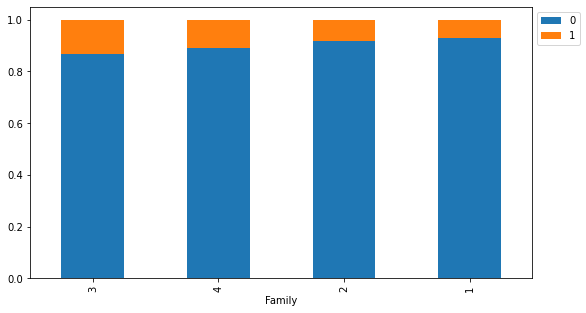

In [ ]:
stacked_barplot(df, "Family" ,"Personal_Loan")

**Family vs Personal Loan**

Family consisting of 3 people have the most loans taken - 133/877 = 15.17% conversion.

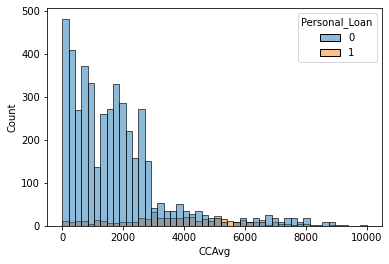

In [ ]:
sns.histplot(data=df,x="CCAvg",hue="Personal_Loan");

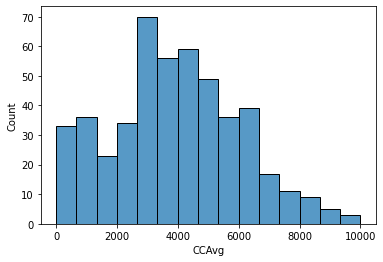

In [ ]:
sns.histplot(data=df_loan_accepted,x="CCAvg");

**CCAvg vs Personal Loan**

The variable CCAvg does not have any significant characteristics interns of Loan acceptance. Loan acceptance is almost spread across the total range of the CCAvg variable, meaning people with low CCAvg or high CCAvg - everybody has a loan taken to some extent.

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


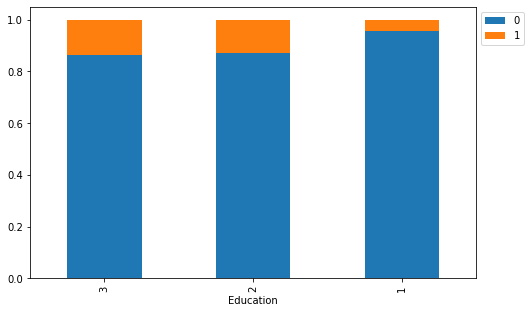

In [ ]:
stacked_barplot(df, "Education" ,"Personal_Loan")

**Education vs Personal Loan**

People with Education level 3 - Advanced/Professional has most loans taken. This could be because of they need a loan to cover their educational expenses.

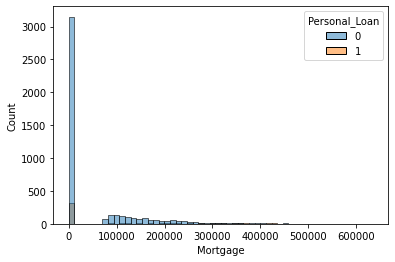

In [ ]:
sns.histplot(data=df,x="Mortgage",hue="Personal_Loan");

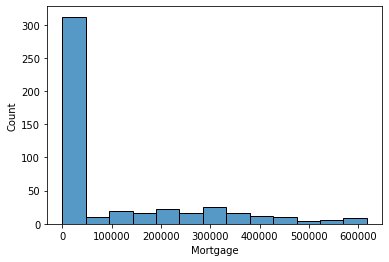

In [ ]:
sns.histplot(data=df_loan_accepted,x="Mortgage");

**Mortgage vs Personal Loan**

From the above 2 graphs we can say that most people with 0 mortgage have taken the loan. **We can safely assume that people with Mortage already in their name did not take the loan.**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


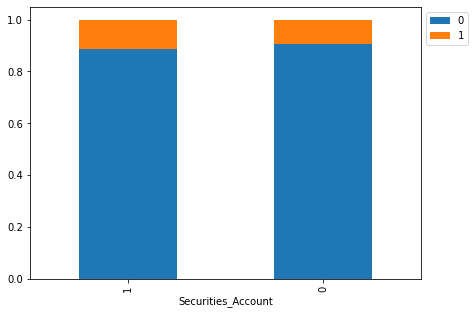

In [ ]:
stacked_barplot(df, "Securities_Account" ,"Personal_Loan")

**Securities Account vs Personal Loan**

Although people with no securities account seem to have most loans taken, if we take the percentage conversion - it is the people with securities account have the highest conversion - 60/462 = ~13%.

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


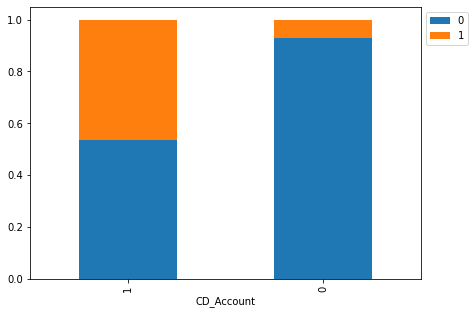

In [ ]:
stacked_barplot(df, "CD_Account" ,"Personal_Loan")

**CD Account vs Personal Loan**

Almost all the people with Certificate of Deposit account with the bank have taken the personal loan - 140/162 = ~86%

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


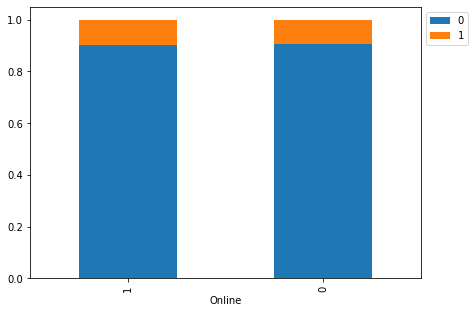

In [ ]:
stacked_barplot(df, "Online" ,"Personal_Loan")

**Online vs Personal Loan**

The variable Online does not have a significant characteristic interms of a loan being taken.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


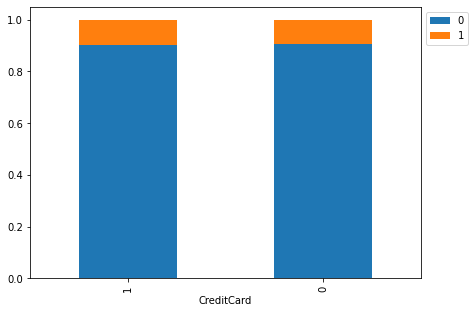

In [ ]:
stacked_barplot(df, "CreditCard" ,"Personal_Loan")

**Credit Card vs Personal Loan**

As we saw for Online, the variable Credit Card does not have any important characteristic - the percentage of number of loans taken for each category is almost equal.

In [ ]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

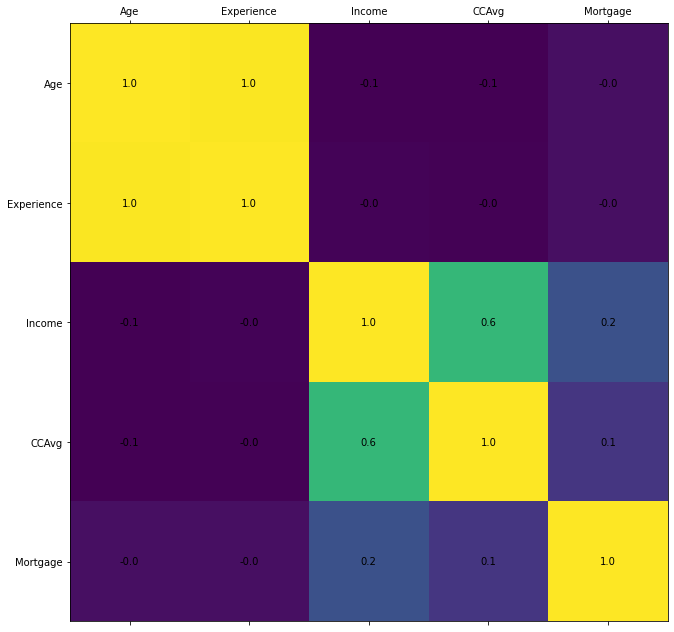

In [ ]:
plot_corr(df)

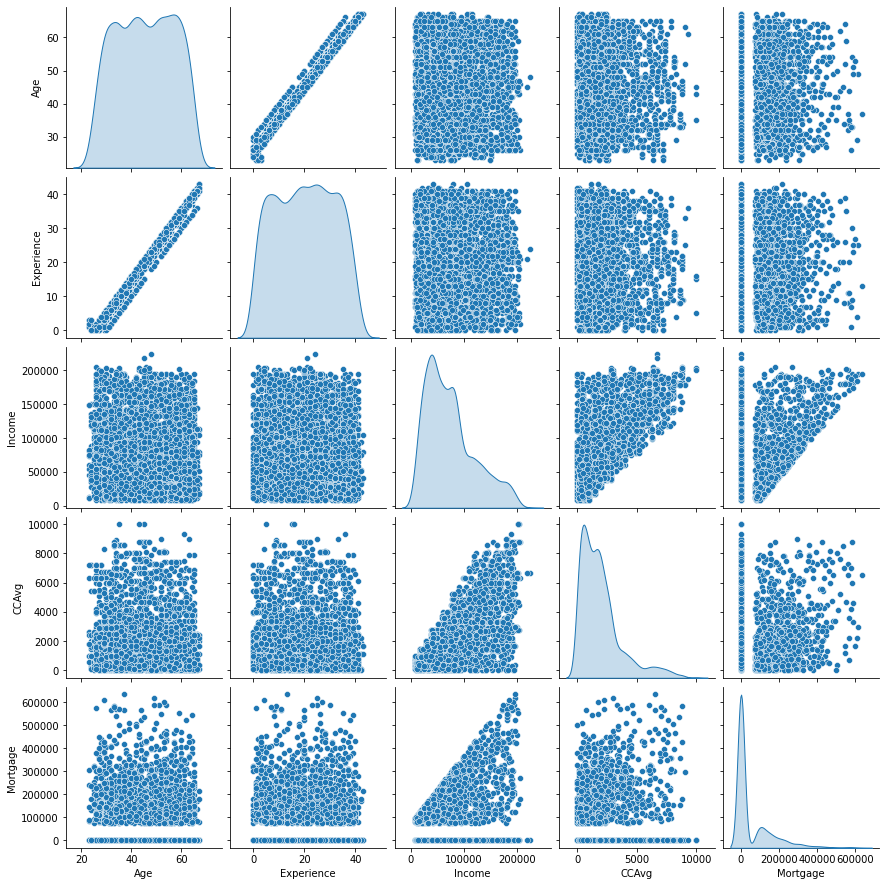

In [ ]:
sns.pairplot(df,diag_kind='kde');

**Relationship between Independent variables**

*   From the above two plots, we could clearly see the direct positive relationship between **Experience** and **Age** - as age increase, experience also increases. The correlation is exactly +1.
*   The variables **Income** and **Mortgage** have direct relationship as well. People with high income have high Mortgage. They have positive correlation of 0.2
*   Similarly, **Income** and **CCAvg** have direct positive relationship. People with high income have high CCAvg. They have a high positive correlation of 0.6.







In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Key Highlights from EDA, Outliers Treatment**

*   There were a total of 14 variables including ID column, which was deleted later. Categorical columns - 8, Numerical Columns - 5.
*   Zipcode had highest number of unique values - 467

**Data Cleaning**

*   The dataset did not have any duplicated or null values.
*   The variable experience had few negative values. Since Experience cannot be negative, this was examined further and was reset to its positive value.

**EDA**

*   Both Age and Experince have similar distribution with 4 peaks.
*   Out of 5000, 3462 does not have Mortgage.
*   People in the age 23,24,25,66,67 did not take the loan. Most people at age 34 have taken the loan. There are 5 peaks at early 30s, late 30s, mid 40s, early 50s and late 50s, where the people have taken the loan.
*   people with highest number of years of experience 42, 43 did not take the loan. Other than that, we could see peaks at close to 10, later 10, mid 20, mid 30 years of experience - denoting people at this Experience level have taken the loan.
*   People who have taken the loan have salaries beyond $60,000.
*   Of all the ZIPcodes, the ZIP code 94720 has the most number of loans taken - 19 loans, followed by the ZIPCode 94305 - 13 loans.
*   Family consisting of 3 people have the most loans taken - 133/877 = 15.17% conversion.
*   People with Education level 3 - Advanced/Professional had most loans taken among the other Education levels.
*   Most people with 0 mortgage have taken the loan.
*   Almost all the people with Certificate of Deposit account with the bank have taken the personal loan - 140/162 = ~86%
*   From the above two plots, we could clearly see the direct positive relationship between Experience and Age - as age increase, experience also increases. The correlation is exactly +1.
*   The variables Income and Mortgage have direct relationship as well. People with high income have high Mortgage. They have positive correlation of 0.2.
*   Similarly, Income and CCAvg have direct positive relationship. People with high income have high CCAvg. They have a high positive correlation of 0.6.

**Outliers Treatment**

No outliers Treatment was necessary as the data seemed reasonable upon examination.

# Logistic Regression

In [ ]:
df_lr = df.copy()
df_dt = df.copy()

In [ ]:
df_lr.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3388,45,21,115000,91320,2,3300,1,85000,0,0,0,1,0
2173,34,10,34000,93407,1,1700,1,164000,0,0,0,0,0
640,43,18,85000,94960,1,3700,3,327000,0,1,0,1,0
3300,62,38,43000,92354,1,1900,2,0,0,0,0,1,0
3963,58,32,38000,93106,3,2200,3,0,0,0,0,1,0


In [ ]:
df_dt.sample(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4442,48,23,62000,91367,4,3600,3,83000,0,0,0,0,1
3672,38,13,65000,91320,3,500,3,0,0,0,0,1,0
1960,44,19,30000,95616,4,0,2,0,0,0,0,1,0
2197,60,35,34000,94102,1,300,3,0,0,0,0,1,0
342,43,19,118000,91304,2,3300,1,0,0,0,0,0,1


We will create one hot encoding for only 3 variables of all the categorical variables - because except for ZIPcode, Family, and Education all other categorical variables have only 2 levels or types.  

In [ ]:
X_lr = df_lr.drop(["Personal_Loan"], axis=1)
Y_lr = df_lr["Personal_Loan"]

dummies_cols_lr = ['ZIPCode','Family','Education']

X_lr = pd.get_dummies(X_lr,columns=dummies_cols_lr,drop_first=True)

# Splitting data in train and test sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, Y_lr, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train_lr.shape)
print("Shape of test set : ", X_test_lr.shape)
print("Percentage of classes in training set:")
print(y_train_lr.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_lr.value_counts(normalize=True))

Shape of Training set :  (3500, 480)
Shape of test set :  (1500, 480)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


**What should we focus on improving - Accuracy vs Recall vs Precision?**

In our case, we are supposed to be suggesting who would take a loan given the details for each ID, so that we could focus more on those people who would take a loan and hence the bank could increase the revenue.

*   **True Positives** - Those who were predicted to take the loan and have actually taken the loan.
*   **True Negatives** - Those who were predicted not to take the loan and have not taken the loan.
*   **False Positives** - We predict a person who take a loan but actually he did not take the loan.
*   **False Negatives** - We predict the person would not take a loan, but he takes the loan.

In this case, False Negatives are missed opportunities, and the bank cannot afford to lose more opportunities. Therefore, we must reduce the numnber of False Negatives. If we reduce the False Negatives, the recall value would go up and therefore **we must try to build a model that has high Recall value based on this problem description**.






In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [ ]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train_lr, y_train_lr)

In [ ]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train_lr.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_

## Coefficient Interpretation:

We saw earlier in the bivariate analysis between independent variables and the dependent variable - almost all the people with CD_Account took a loan, most people took loan from ZIPcodes - "94720","94305", people with advanced degree took loan, people with high age not taking the loan - all these correlates with the coefficient values.
*   The coefficients **Experience**,**Income to some extent**,**CCAvg to some extent**, **CD_Account**, some of the levels in ZIPCode, **Family_3**, **Family_4**, **Education_2**,**Education_3** all have positive coefficients - meaning increase in these variables will increase the chance of a person taking a loan.
*   The coefficients **Age**, **Securities_Account**, **CreditCard**, many levels of ZIPCode all have negative coefficients - meaning increase in these variables will decrease the chance of a person taking a loan.



## Coefficient Conversion to odds

In [ ]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train_lr.columns).T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZIPCode_94035,ZIPCode_

### Coefficient Interpretations:


*   **Age**: Holding all other features constant a 1 unit change in Age will decrease the odds of a person taking the loan by 0.72 times or a 28.26% decrease in odds of of a person taking the loan.
*   **Experience**: Holding all other features constant a 1 unit change in Experience will increase the odds of a person taking the loan by 1.39 times or a 39.02% increase in odds of a person taking the loan.
*   **Securities_Account**: Holding all other features constant a 1 unit change in Securities_Account will decrease the odds of a person taking the loan by 0.95 times or a 4.7% decrease in odds of of a person taking the loan.
*   **CD_Account**: Holding all other features constant a 1 unit change in Experience will increase the odds of a person taking the loan by 4.18 times or a 317.72% increase in odds of a person taking the loan.

Similarly it could be explained for other variables as well.






Let us check the performance of the model on the training set.

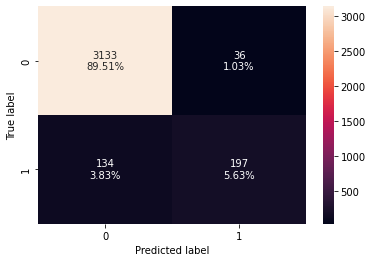

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train_lr, y_train_lr)

In [ ]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train_lr, y_train_lr
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951429,0.595166,0.845494,0.698582


We wanted to increase the Recall in our case, the recall value from the model seems to be poor, but the Accuracy is good. As said earlier, in our case Accuracy does not make much importance, because we want high Recall in our case so as for the bank to earn more from interests.

Let us check the same model's performace on the testing dataset to see if the model has overfit or underfit the data.

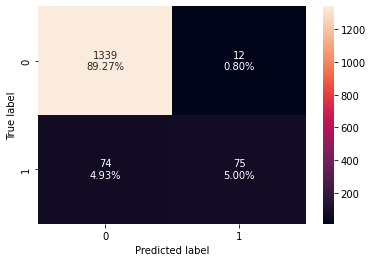

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test_lr, y_test_lr)

In [ ]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test_lr, y_test_lr
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.942667,0.503356,0.862069,0.635593


In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_lr, lg.predict_proba(X_train_lr)[:, 1])
# list =[0.9,0.7,0.8]
# argmax(list)====index=0

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.12729017906723297


In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train_lr, y_train_lr, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.908286,0.897281,0.508562,0.64918


In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test_lr, y_test_lr, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.906,0.872483,0.515873,0.648379


Since we had the initial threshold value as 0.5, the Recall value was low and now with optimum threshold value, the Recall value has increased.

The model seems to have slightly overfit the data based on training set. Recall value and Accuracy is slightly lower for the testing data.

Since, our model here does not have high Recall, let us see if we could remove some variables so as to see if the model performace increases.

Let us see if removing variables one by one increases the Recall. If we were to remove a variable for a hotcodeencoding one it has to be all levels, instead of just 1 or 2 levels. So, lets completely remove the variable ZIPCode to see if Recall increases.

Building model removing the variable **ZIPCode** and see if the Recall value increases.

In [ ]:
df_lr1 = df.copy()

In [ ]:
df_lr1 = df_lr1.drop(["ZIPCode"], axis = 1)

In [ ]:


X_lr1 = df_lr1.drop(["Personal_Loan"], axis=1)
Y_lr1 = df_lr1["Personal_Loan"]

dummies_cols_lr1 = ["Family",'Education']

X_lr1 = pd.get_dummies(X_lr1,columns=dummies_cols_lr1,drop_first=True)

# Splitting data in train and test sets
X_train_lr1, X_test_lr1, y_train_lr1, y_test_lr1 = train_test_split(
    X_lr1, Y_lr1, test_size=0.30, random_state=1
)

In [ ]:
lg1 = LogisticRegression(solver="newton-cg", random_state=1)
model1 = lg1.fit(X_train_lr1, y_train_lr1)

In [ ]:
# let us check the coefficients and intercept of the model

coef_df1 = pd.DataFrame(
    np.append(lg1.coef_, lg1.intercept_),
    index=X_train_lr1.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df1.T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Intercept
Coefficients,-0.33511,0.333325,0.000043,0.000156,7.258450e-07,-0.040679,1.463794,-0.235758,-0.324069,-0.665723,1.302562,0.887276,1.784878,1.990785,-0.215052


In [ ]:
# converting coefficients to odds
odds1 = np.exp(lg1.coef_[0])

# finding the percentage change
perc_change_odds1 = (np.exp(lg1.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds1, "Change_odd%": perc_change_odds1}, index=X_train_lr1.columns).T

,Age,Experience,Income,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
Odds,0.715260,1.395601,1.000043,1.000156,1.000001,0.960137,4.322329,0.789972,0.723201,0.513902,3.678711,2.428505,5.958854,7.321280
Change_odd%,-28.474025,39.560110,0.004299,0.015630,0.000073,-3.986316,332.232927,-21.002824,-27.679934,-48.609807,267.871060,142.850481,495.885367,632.127975


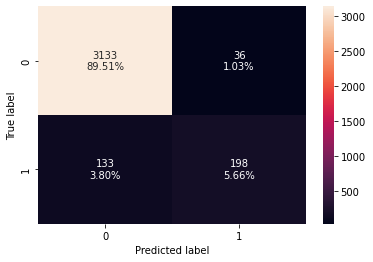

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg1, X_train_lr1, y_train_lr1)

In [ ]:
log_reg_model_train_perf1 = model_performance_classification_sklearn_with_threshold(
    lg1, X_train_lr1, y_train_lr1
)

print("Training performance:")
log_reg_model_train_perf1

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951714,0.598187,0.846154,0.700885


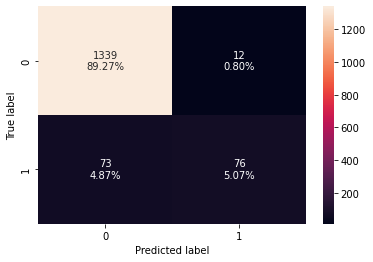

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg1, X_test_lr1, y_test_lr1)

In [ ]:
log_reg_model_test_perf1 = model_performance_classification_sklearn_with_threshold(
    lg1, X_test_lr1, y_test_lr1
)

print("Test set performance:")
log_reg_model_test_perf1

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.943333,0.510067,0.863636,0.64135


ROC on Training set:

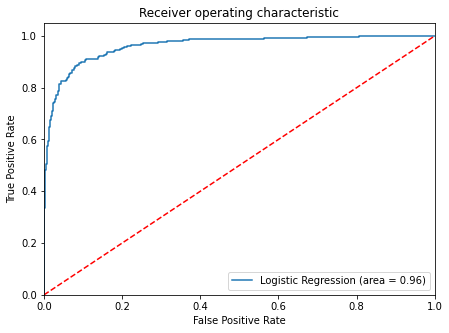

In [ ]:
logit_roc_auc_train1 = roc_auc_score(y_train_lr1, lg1.predict_proba(X_train_lr1)[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_train_lr1, lg1.predict_proba(X_train_lr1)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

ROC on Testing Set:

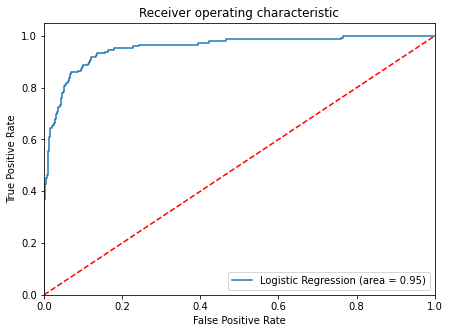

In [ ]:
logit_roc_auc_test1 = roc_auc_score(y_test_lr1, lg1.predict_proba(X_test_lr1)[:, 1])
fpr1, tpr1, thresholds1 = roc_curve(y_test_lr1, lg1.predict_proba(X_test_lr1)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr1, tpr1, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Optimum Threshold Calculation:

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr1, tpr1, thresholds1 = roc_curve(y_train_lr1, lg1.predict_proba(X_train_lr1)[:, 1])
# list =[0.9,0.7,0.8]
# argmax(list)====index=0

optimal_idx1 = np.argmax(tpr1 - fpr1)
optimal_threshold_auc_roc1 = thresholds1[optimal_idx1]
print(optimal_threshold_auc_roc1)

0.1260204118655426


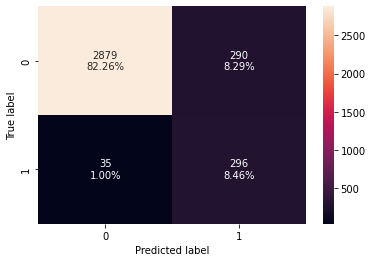

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg1, X_train_lr1, y_train_lr1, threshold=optimal_threshold_auc_roc1
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc1 = model_performance_classification_sklearn_with_threshold(
    lg1, X_train_lr1, y_train_lr1, threshold=optimal_threshold_auc_roc1
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc1

Training performance:


,Accuracy,Recall,Precision,F1
0,0.907143,0.89426,0.505119,0.645583


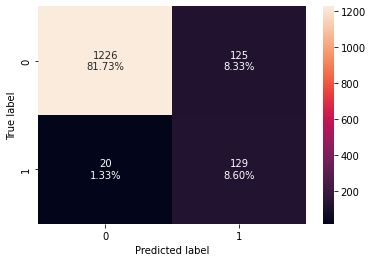

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg1, X_test_lr1, y_test_lr1, threshold=optimal_threshold_auc_roc1
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc1 = model_performance_classification_sklearn_with_threshold(
    lg1, X_test_lr1, y_test_lr1, threshold=optimal_threshold_auc_roc1
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc1

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.903333,0.865772,0.507874,0.640199


Removing **ZIPCode** although increased the Recall with 0.5 as threhold, with the optimum threshold calculation the Recall value for the model with Zipcode is high by around 1%.

We don't want to let go of any earning through interests, therefore let us **keep the variable ZIPCode**.

Similarly, the variables Family and Education were removed to see if the Recall value increased, the Recall value dropped with the removal of Family or Education.  



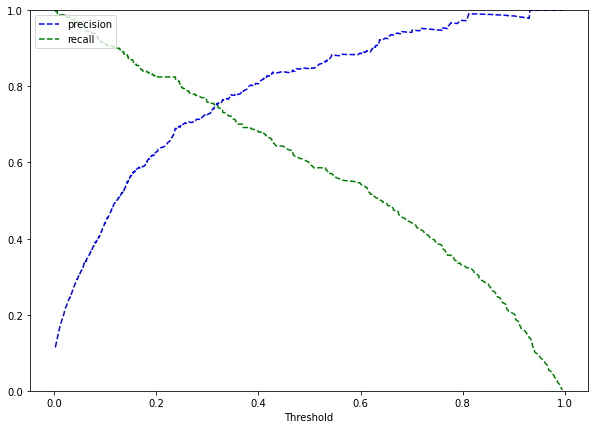

In [ ]:
y_scores = lg.predict_proba(X_train_lr)[:, 1]
prec, rec, tre = precision_recall_curve(y_train_lr, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.34

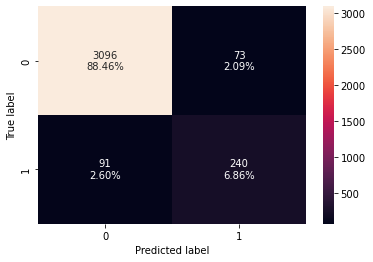

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train_lr, y_train_lr, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train_lr, y_train_lr, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.953143,0.725076,0.766773,0.745342


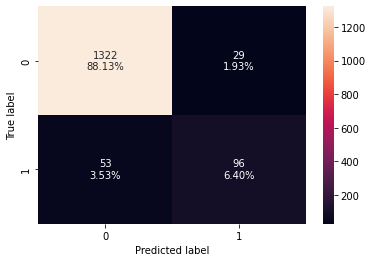

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test_lr, y_test_lr, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test_lr, y_test_lr, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.945333,0.644295,0.768,0.70073


From the Precision_Recall Curve we can see that for better precision and recall balance the threshold has to be around 0.34. We can clearly see that the Recall is falling beyond that point, and bsed on our problem description low precision means high False Positives which is we will be focusing more on the people who would not take the loan. Although we would be investing a bit higher on the people who would not take a loan, we dont want to lower our Recall value by not focusing on the people who would take the loan. Therefore, threshold value of 0.126 can be used in our classification problem with the model containing all the variables including ZIPCode.

Thus, the Recall value of our final model on the training set is 89.4% and on the testing set is 86.5% and we would want to concentrate more / conduct campaign for the people with:

*   CD_Account = Yes
*   Higher Experience
*   Family of 3 and 4
*   Education level of 3 and 2

to increase the chances of people taking the loan.

# Decision Tree Model

In [ ]:
X = df.drop("Personal_Loan" , axis=1)
y = df.pop("Personal_Loan")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [ ]:
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9786666666666667


As we know already, the accuracy is 1 for the training set because we let the tree grow to this fullest extent so that it has so many sub classifications to exactly match the values in training set. The accuracy value for the testing set also close to 1 - 0.98, so the model might not have overfit the data.

Since, Recall plays a significant role in this problem description let us see examine Recall.

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

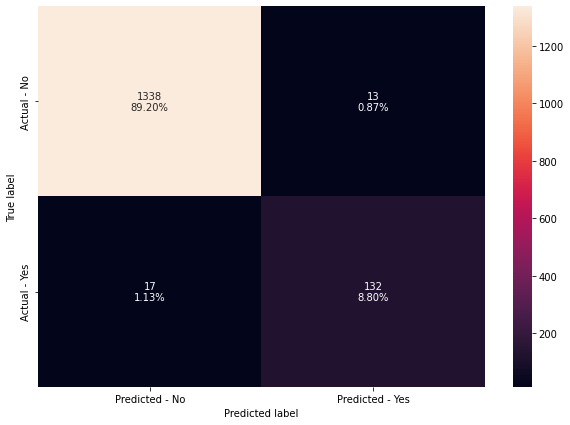

In [ ]:
make_confusion_matrix(dTree,y_test)

In [ ]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


In [ ]:
get_recall_score(dTree1)

Recall on training set :  1.0
Recall on test set :  0.8791946308724832


The Recall value for the testing test is 0.88 while for the testing set it is 1 for when the Creiterion is **Gini**. Checking the same statistics for **Entropy**, the recall value is bit low. So, the model has overfit the data.

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


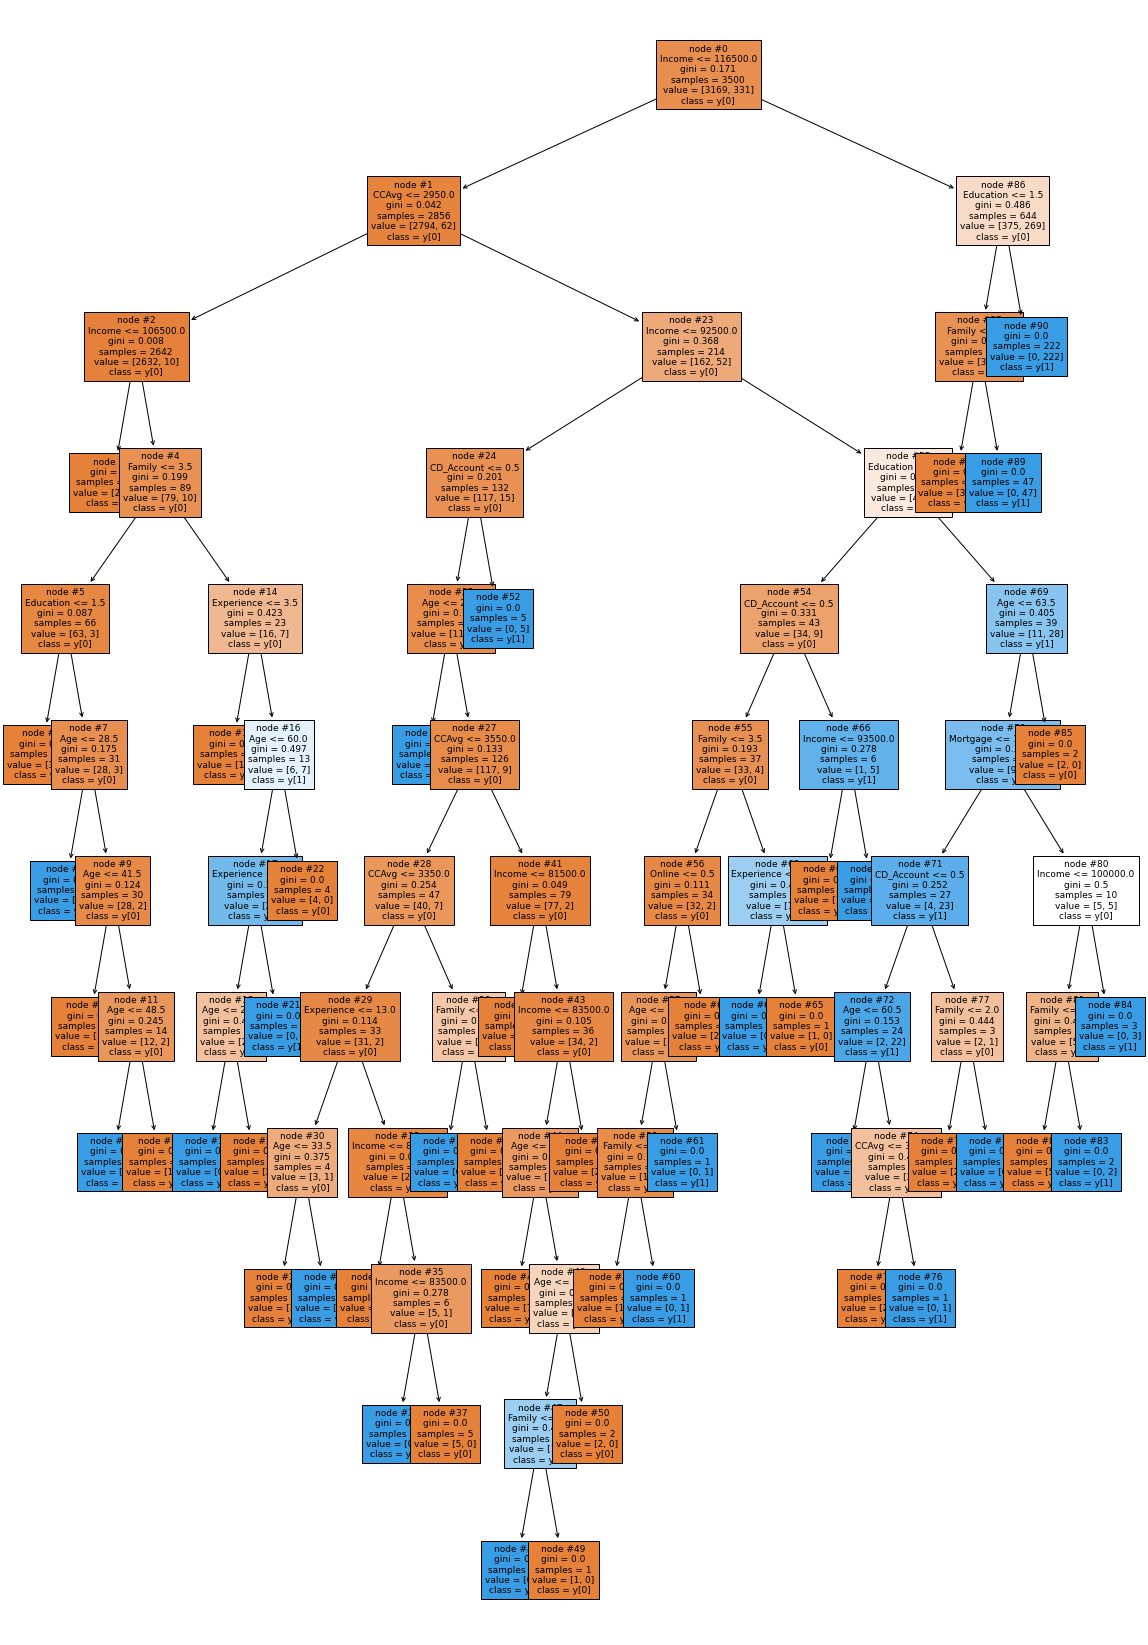

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116500.00
|   |--- CCAvg <= 2950.00
|   |   |--- Income <= 106500.00
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106500.00
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- E

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.308336
Family              0.169593
CCAvg               0.044408
Age                 0.035708
CD_Account          0.025711
Experience          0.011203
Mortgage            0.003014
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


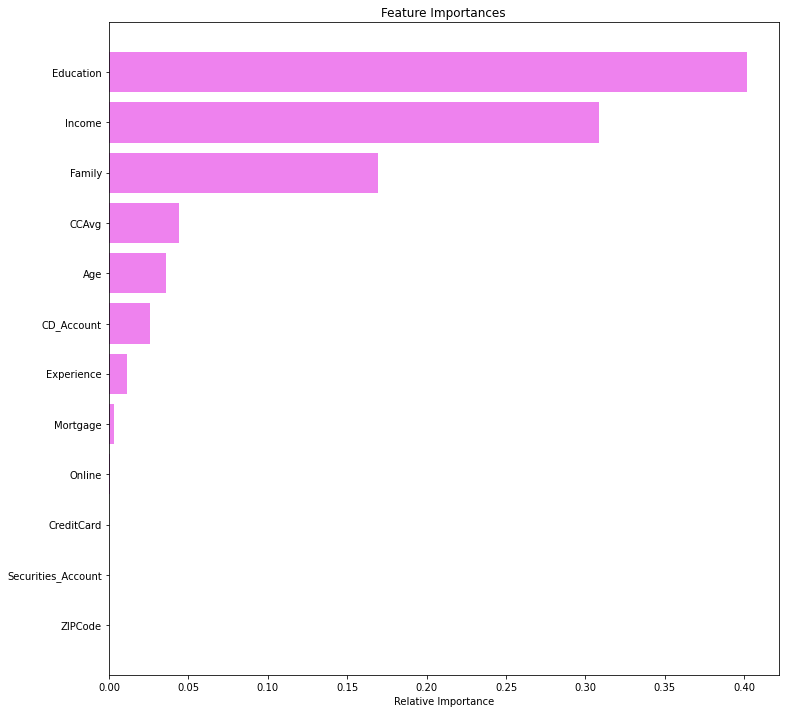

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

so, we have built the complete tree now. From the complete tree, we can see that the varibles - **Education**, **Income**, **Family**, **CCAvg**, **Age**, **CD_Account**, **Experience**, **Mortgage** are all important variables compared to the others.

We already have a good accuracy with the complete tree built, but the recall is quuite low for testing set compared to the training set. Therfore, the model has overfit the data. Let us try Pre and Post Pruning to see a balanced model with good Recall value.

In the current fully grown tree, the model has a max_depth of 12 and the total number of nodes are 90. So, in Pre-pruing while doing hyper parameter tuning let us run the model between these values and see if a simpler model could be balanced and have good recall value.

**Pre-Pruining**

**Hyper parameter Tuning**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,12),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [10,20,30,40,50,60,70,80,90],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=30,
                       min_impurity_decrease=1e-05, random_state=1,
                       splitter='random')

After tuning the hyperparameters, the bext creiterion is **Entropy**, with **Max_depth** - 10 and with **max_leaf_nodes** = 30.

Let us see the accuracy and recall values for this result.

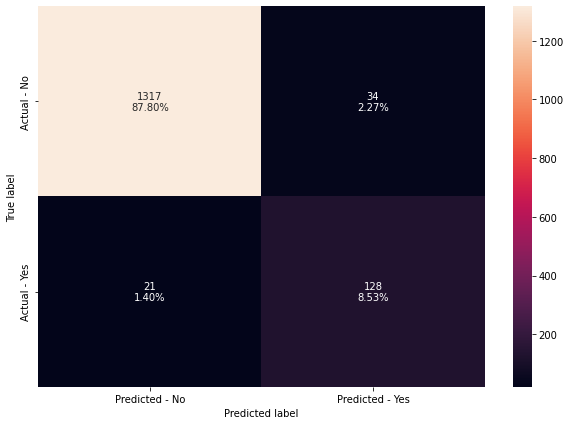

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9808571428571429
Accuracy on test set :  0.9633333333333334
Recall on training set :  0.9848942598187311
Recall on test set :  0.8590604026845637


The accuracy value seems to be matching for both testing and training data, but the recall value still has huge difference the training and testing values.

Thus, the model is still overfitting the data and the Recall value got here is still lower than the recall value we got on the testing set by the logistic regression (~86%).

We dont have a balanced model between Training and testing , further the model has lower recall value for testing, when compared with the recall value from Logistic regression. Therefore, let us try the post-pruning and see if there are any better results.

**Visualinzing the tree from Pre-Pruning:**

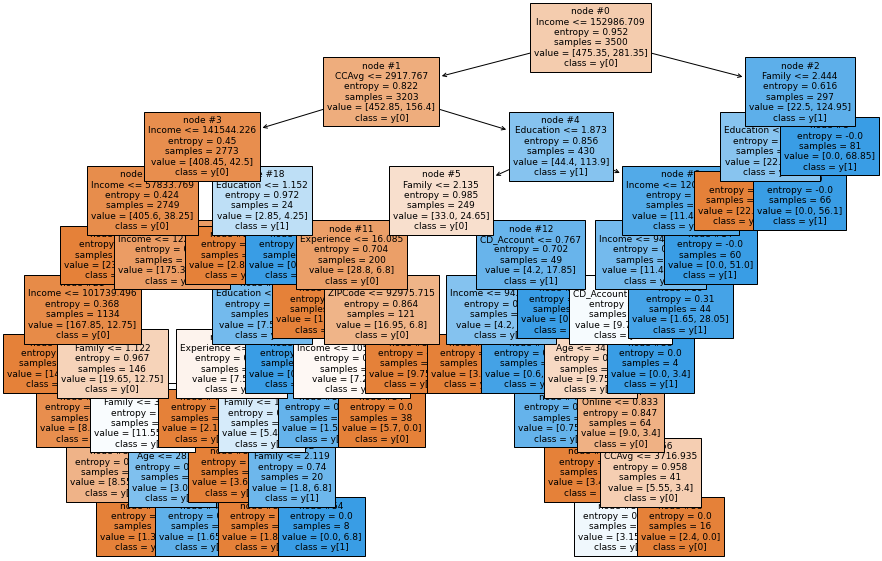

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 152986.71
|   |--- CCAvg <= 2917.77
|   |   |--- Income <= 141544.23
|   |   |   |--- Income <= 57833.77
|   |   |   |   |--- weights: [230.25, 0.00] class: 0
|   |   |   |--- Income >  57833.77
|   |   |   |   |--- Income <= 122508.01
|   |   |   |   |   |--- Income <= 101739.50
|   |   |   |   |   |   |--- weights: [148.20, 0.00] class: 0
|   |   |   |   |   |--- Income >  101739.50
|   |   |   |   |   |   |--- Family <= 1.12
|   |   |   |   |   |   |   |--- weights: [8.10, 0.85] class: 0
|   |   |   |   |   |   |--- Family >  1.12
|   |   |   |   |   |   |   |--- Family <= 3.06
|   |   |   |   |   |   |   |   |--- weights: [8.55, 3.40] class: 0
|   |   |   |   |   |   |   |--- Family >  3.06
|   |   |   |   |   |   |   |   |--- Age <= 28.14
|   |   |   |   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  28.14
|   |   |   |   |   |   |   |   |   |--- weights: [1.65, 8.50] class: 1
|   |   |   |   |--- Income >  122508

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Income              0.458875
CCAvg               0.244083
Education           0.168894
Family              0.087444
Experience          0.010002
ZIPCode             0.009713
CD_Account          0.009397
Age                 0.008713
Online              0.002879
Mortgage            0.000000
Securities_Account  0.000000
CreditCard          0.000000


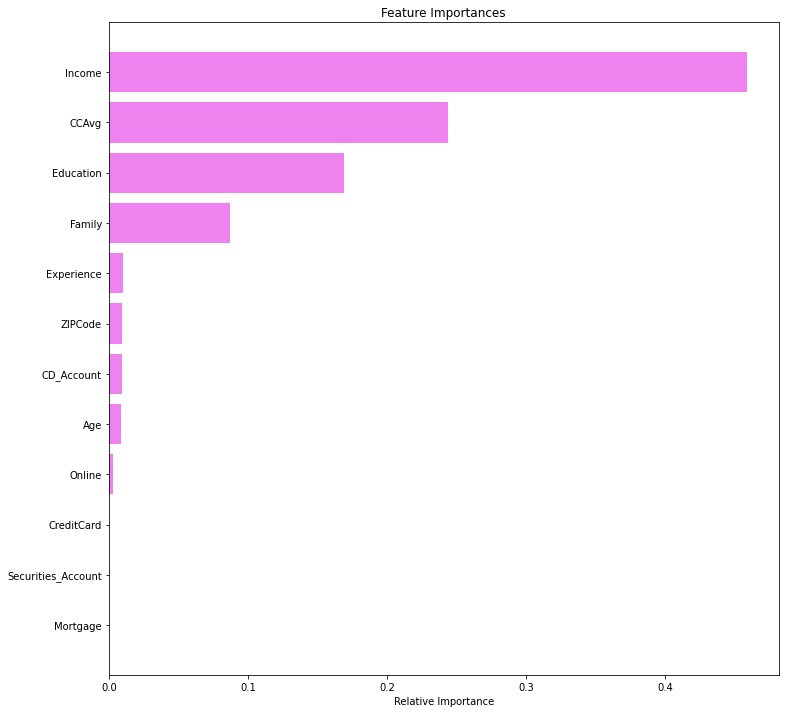

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As for the important variables are considered after Pre-Pruning, **Online** is now considered important to some extent while compared to the full tree model.

**Post-Pruning**

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000409,0.006423
9,0.000476,0.006900


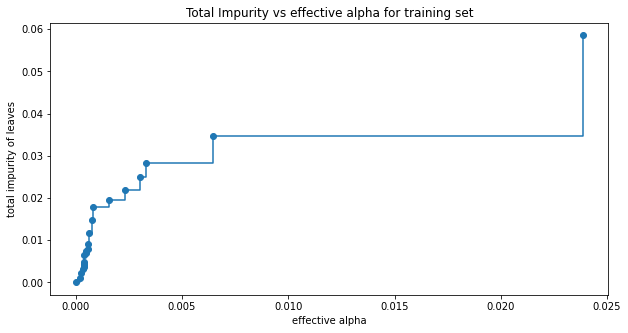

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

The above grapgh confirms the theory, "Impurity increases as we increase the alpha value".

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


The smallest alpha value that is to be removed first is 0.0563

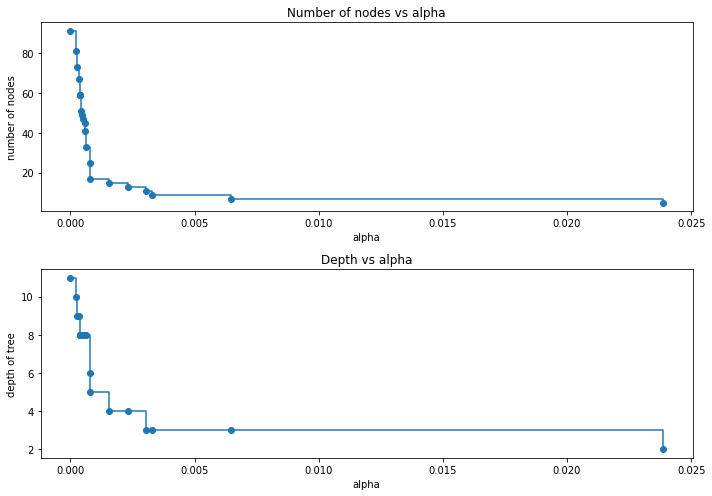

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

The above graphs for the training data confirms that as we decrease the number of nodes or the depth of the tree, the alpha or the error value increases and there is also a chance that the overfitting decreases.

Let us check the accuracy now.

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

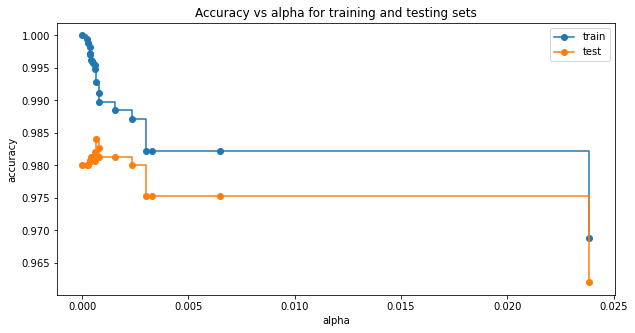

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

For the testing data, we could see that the accuracy increasing and somewhere around 0.001, the maximum accuracy for the testing data is reached. It is at this point, the model is not overfitting or not underfitting, and there is a balance between the accuracy of training data and the testing data.

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.984


As said above, at the alpha value of 0.000641, maximum accuracy is reached. Also the accuracy value closely matched for both testing and testing data.

Since, based on our problem statement accuracy is not a good measure, let us check the recall values.


In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

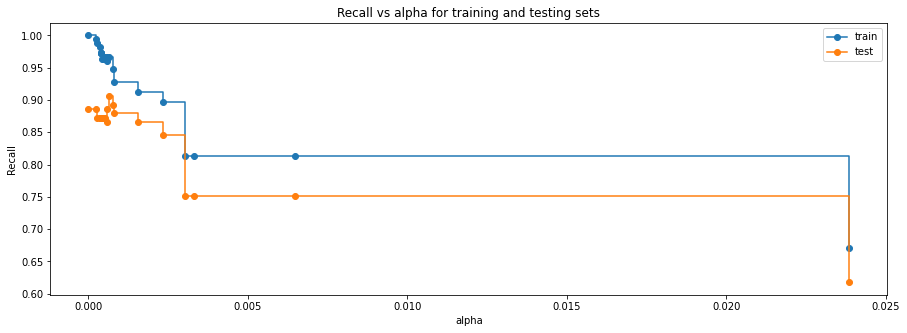

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


The recall value for both training and testing appears to be matching at the alpha = 0.000641. Let us check with the confusion matrix metrics.

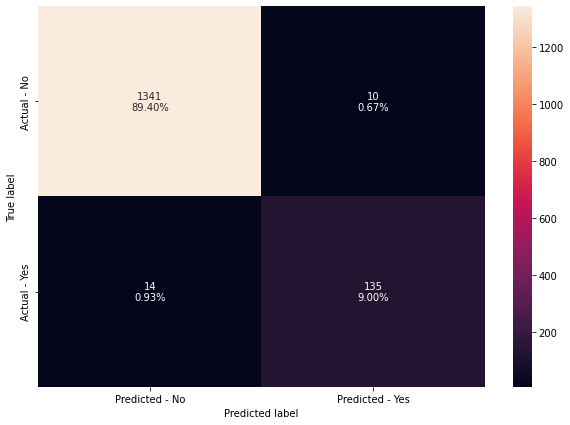

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9667673716012085
Recall on test set :  0.9060402684563759


The recall value for the final **Post-Pruned** tree for the training set is 96.67% and for the testing set, it is 90.60%. Although there is still a mismatch between the training and testing recall value, the values are stronger than the ones we found by Logistic Regression.

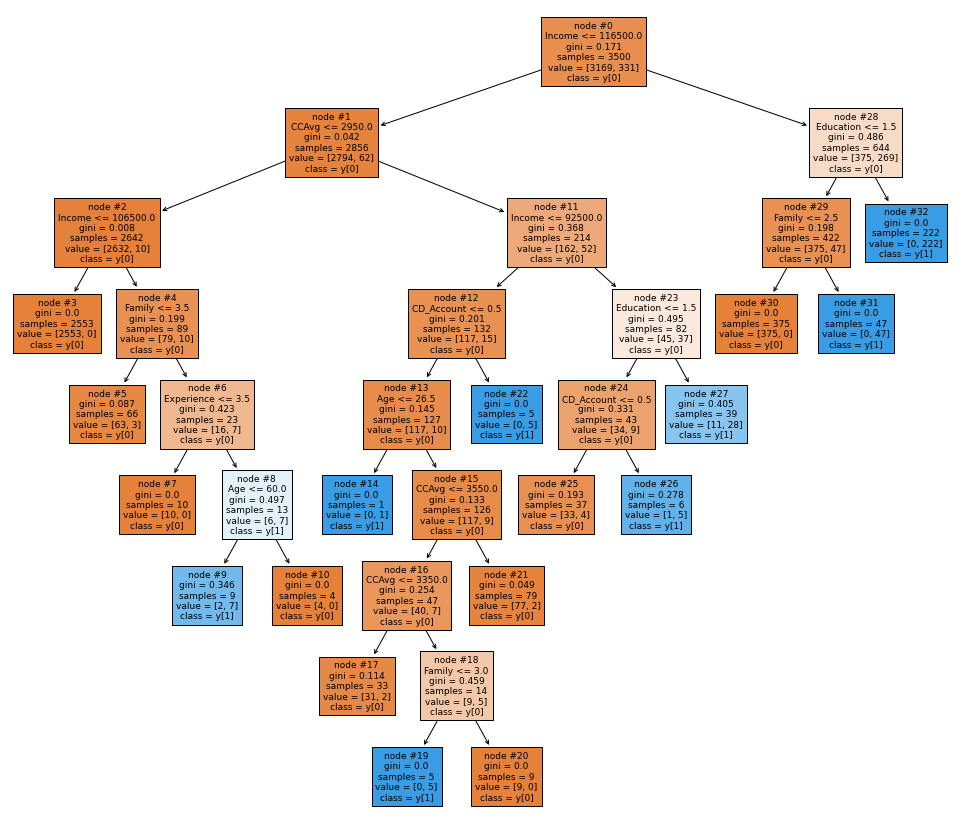

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

Looks like the final model gas a depthh value of 9 and there are 32 nodes.

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116500.00
|   |--- CCAvg <= 2950.00
|   |   |--- Income <= 106500.00
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106500.00
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- Income <= 92500.00
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3550.00
|   |   |   |   |   |   |--- CCAvg <= 3350.00
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |  

**Interpreations**

1.   For one of the paths, If Income is <= 106500, Family is <= 3.5, Experience <= 3.5, Age is <= 60, then the datapoins in this small region will be classified as "did not take the loan".

Similar interpretations could be made for other paths.



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


So, based on the Post Pruned model, the important variables are:

*   **Education**
*   **Income**
*   **Family**
*   **CCAvg**
*   **CD_Account**
*   **Age**
*   **Experience**












In [ ]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression mode with ZIPCode','Logistic Regression model without ZIPCode','Initial decision tree model with Gini as Creiterion','Initial decision tree model eith Entropy as Criterion','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.897, 0.894, 1.0, 1.0, 0.985, 0.967], 'Test_Recall':[0.872, 0.865, 0.886, 0.879, 0.859, 0.906]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Logistic Regression mode with ZIPCode,0.897,0.872
1,Logistic Regression model without ZIPCode,0.894,0.865
2,Initial decision tree model with Gini as Creit...,1.000,0.886
3,Initial decision tree model eith Entropy as Cr...,1.000,0.879
4,Decision treee with hyperparameter tuning,0.985,0.859
5,Decision tree with post-pruning,0.967,0.906


# Final Conclusion:

We wanted to increase the number of people who took the loan. So, we came up with a model that tells us where to focus more so that the number of people who would take a loan is high.

We realized Recall was supposed to be high so that no opportunities are missed.

From the above comparion for recall value between Training and Testing sets across different models - we can choose the Logistic Regression model with ZIPcode, because this has a good balance between training and testing test, although the decision tree model with post-pruing has highest recall value for the testing dataset.

The Logistic Regression model was easier to follow for whom to focus on to increase the loan acceptance nnumber, compared to Decision Tree. In order to canvas more people to take a loan, we should focus on all the people with CD_Account, Education level of 2, Familt size of 3, and we should focus more on the people who has Annual income greater than $60000.